In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'/Users/jamilyalipons/Downloads/amz_uk_price_prediction_dataset.csv')
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
# Part 1
#Crosstab Analysis
#Create a crosstab between the product category and the isBestSeller status.
#Are there categories where being a best-seller is more prevalent?

In [6]:
df[['categoryName','isBestSeller']]

,categoryName,isBestSeller
0,Hi-Fi Speakers,False
1,Hi-Fi Speakers,True
2,Hi-Fi Speakers,False
3,Hi-Fi Speakers,False
4,Hi-Fi Speakers,False
...,...,...
2222737,Motorbike Clothing,False
2222738,Motorbike Clothing,False
2222739,Motorbike Clothing,False
2222740,Motorbike Clothing,False


In [10]:
9008/len(df.query('categoryName == "Grocery"'))

1.4350804524454357

In [8]:
pd.crosstab(df['categoryName'],df['isBestSeller']).sort_values(by=True,ascending=False)

isBestSeller,False,True
categoryName,,
Health & Personal Care,7750,485
Grocery,5964,313
Sports & Outdoors,825773,303
Pet Supplies,9146,284
Power & Hand Tools,6212,243
...,...,...
Film Cameras,1000,0
Smart Speakers,25,0
Smartwatches,6569,0


In [11]:
crosstab_result = pd.crosstab(df['categoryName'],df['isBestSeller'],normalize='index').sort_values(by=True,ascending=False)
crosstab_result*100 

isBestSeller,False,True
categoryName,,
Health & Personal Care,94.110504,5.889496
Grocery,95.013542,4.986458
Mobile Phone Accessories,96.062992,3.937008
Power & Hand Tools,96.235476,3.764524
"Billiard, Snooker & Pool",96.787149,3.212851
...,...,...
Cameras,100.000000,0.000000
Outdoor Rope Lights,100.000000,0.000000
Computer Cases,100.000000,0.000000


In [15]:
cross_table.sum(axis=1)

categoryName
Health & Personal Care                        8235
Grocery                                       6277
Sports & Outdoors                           826076
Pet Supplies                                  9430
Power & Hand Tools                            6455
                                             ...  
Film Cameras                                  1000
Smart Speakers                                  25
Smartwatches                                  6569
External TV Tuners & Video Capture Cards      2726
eBook Readers & Accessories                    244
Length: 296, dtype: int64

In [14]:
cross_table=pd.crosstab(df['categoryName'],df['isBestSeller']).sort_values(by=True,ascending=False)
((cross_table[True]/( cross_table.sum(axis=1) )) * 100 )

categoryName
Health & Personal Care                      5.889496
Grocery                                     4.986458
Sports & Outdoors                           0.036679
Pet Supplies                                3.011665
Power & Hand Tools                          3.764524
                                              ...   
Film Cameras                                0.000000
Smart Speakers                              0.000000
Smartwatches                                0.000000
External TV Tuners & Video Capture Cards    0.000000
eBook Readers & Accessories                 0.000000
Length: 296, dtype: float64

In [ ]:
#Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category. Compute Cramér's V to understand the strength of association between best-seller status and category.

In [16]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cross_table)

chi2_statistic, chi2_p_value

(33019.04971964154, 0.0)

In [18]:
 # Computing the association between variables in 'crosstab_result' using the "cramer" method
from scipy.stats.contingency import association

association(cross_table, method="cramer")



0.1218814906639688

In [ ]:
# Visualizations:¶
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.





In [19]:
cross_table.head(5)




isBestSeller,False,True
categoryName,,
Health & Personal Care,7750,485
Grocery,5964,313
Sports & Outdoors,825773,303
Pet Supplies,9146,284
Power & Hand Tools,6212,243


<Axes: xlabel='categoryName'>

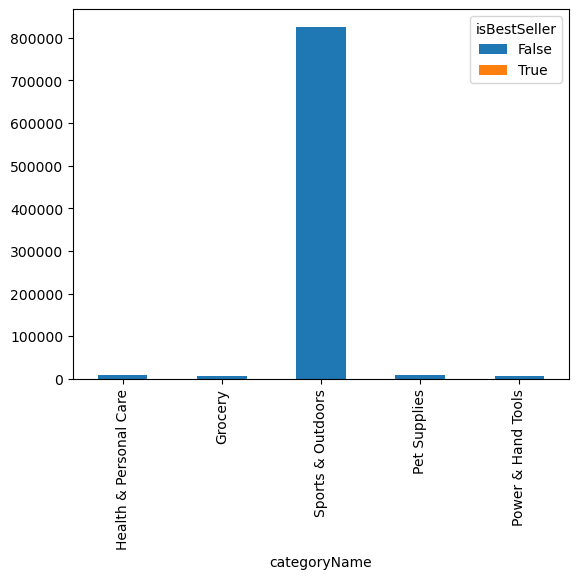

In [20]:
cross_table.head(5).plot(kind='bar',stacked=True)





#Part 2: Exploring Product Prices and Ratings Across Categories and Brands¶
#Objective: Investigate how different product categories influence product prices.


# Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this

In [23]:
df['price'].skew()

26.536194359014953

<Axes: >

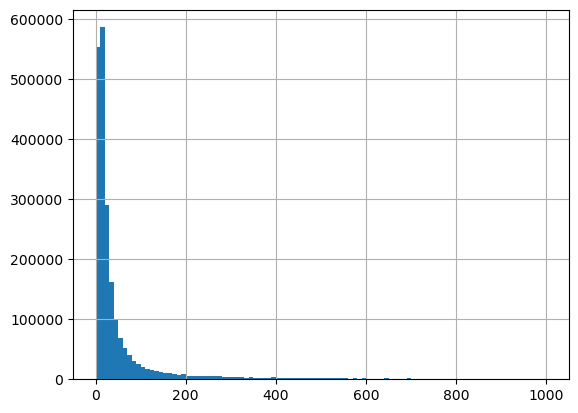

In [22]:
df.query('price<1000')['price'].hist(bins=100)

In [27]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

def tukeys_test_outliers_filter(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (data < lower_bound) | (data > upper_bound)
    
    

df.loc[~df['price'].isin(tukeys_test_outliers(df['price']))]

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...,...
2222737,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",https://m.media-amazon.com/images/I/61ycPU7k4k...,https://www.amazon.co.uk/dp/B0CHSD7P2Q,0.0,0,22.34,False,0,Motorbike Clothing
2222738,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,https://m.media-amazon.com/images/I/51gkh0iYT5...,https://www.amazon.co.uk/dp/B0B7B8FNBQ,0.0,0,97.99,False,0,Motorbike Clothing
2222739,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,https://m.media-amazon.com/images/I/81gJgaMHg4...,https://www.amazon.co.uk/dp/B0BD5FL5FB,0.0,0,52.99,False,0,Motorbike Clothing
2222740,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,https://m.media-amazon.com/images/I/81KQ5askGG...,https://www.amazon.co.uk/dp/B008OYLL4I,4.3,404,79.99,False,0,Motorbike Clothing


In [28]:
len(df_no_outliers)/len(df)

0.8631892500344169

# Violin Plots:
Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

In [46]:
filtered_categories = df['categoryName'].value_counts().head(10).index
filtered_categories

Index(['Sports & Outdoors', 'Skin Care', 'Fragrances', 'Make-up',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Men', 'Women',
       'Handmade Gifts', 'Handmade Artwork'],
      dtype='object', name='categoryName')

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt



/Users/jamilyalipons/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


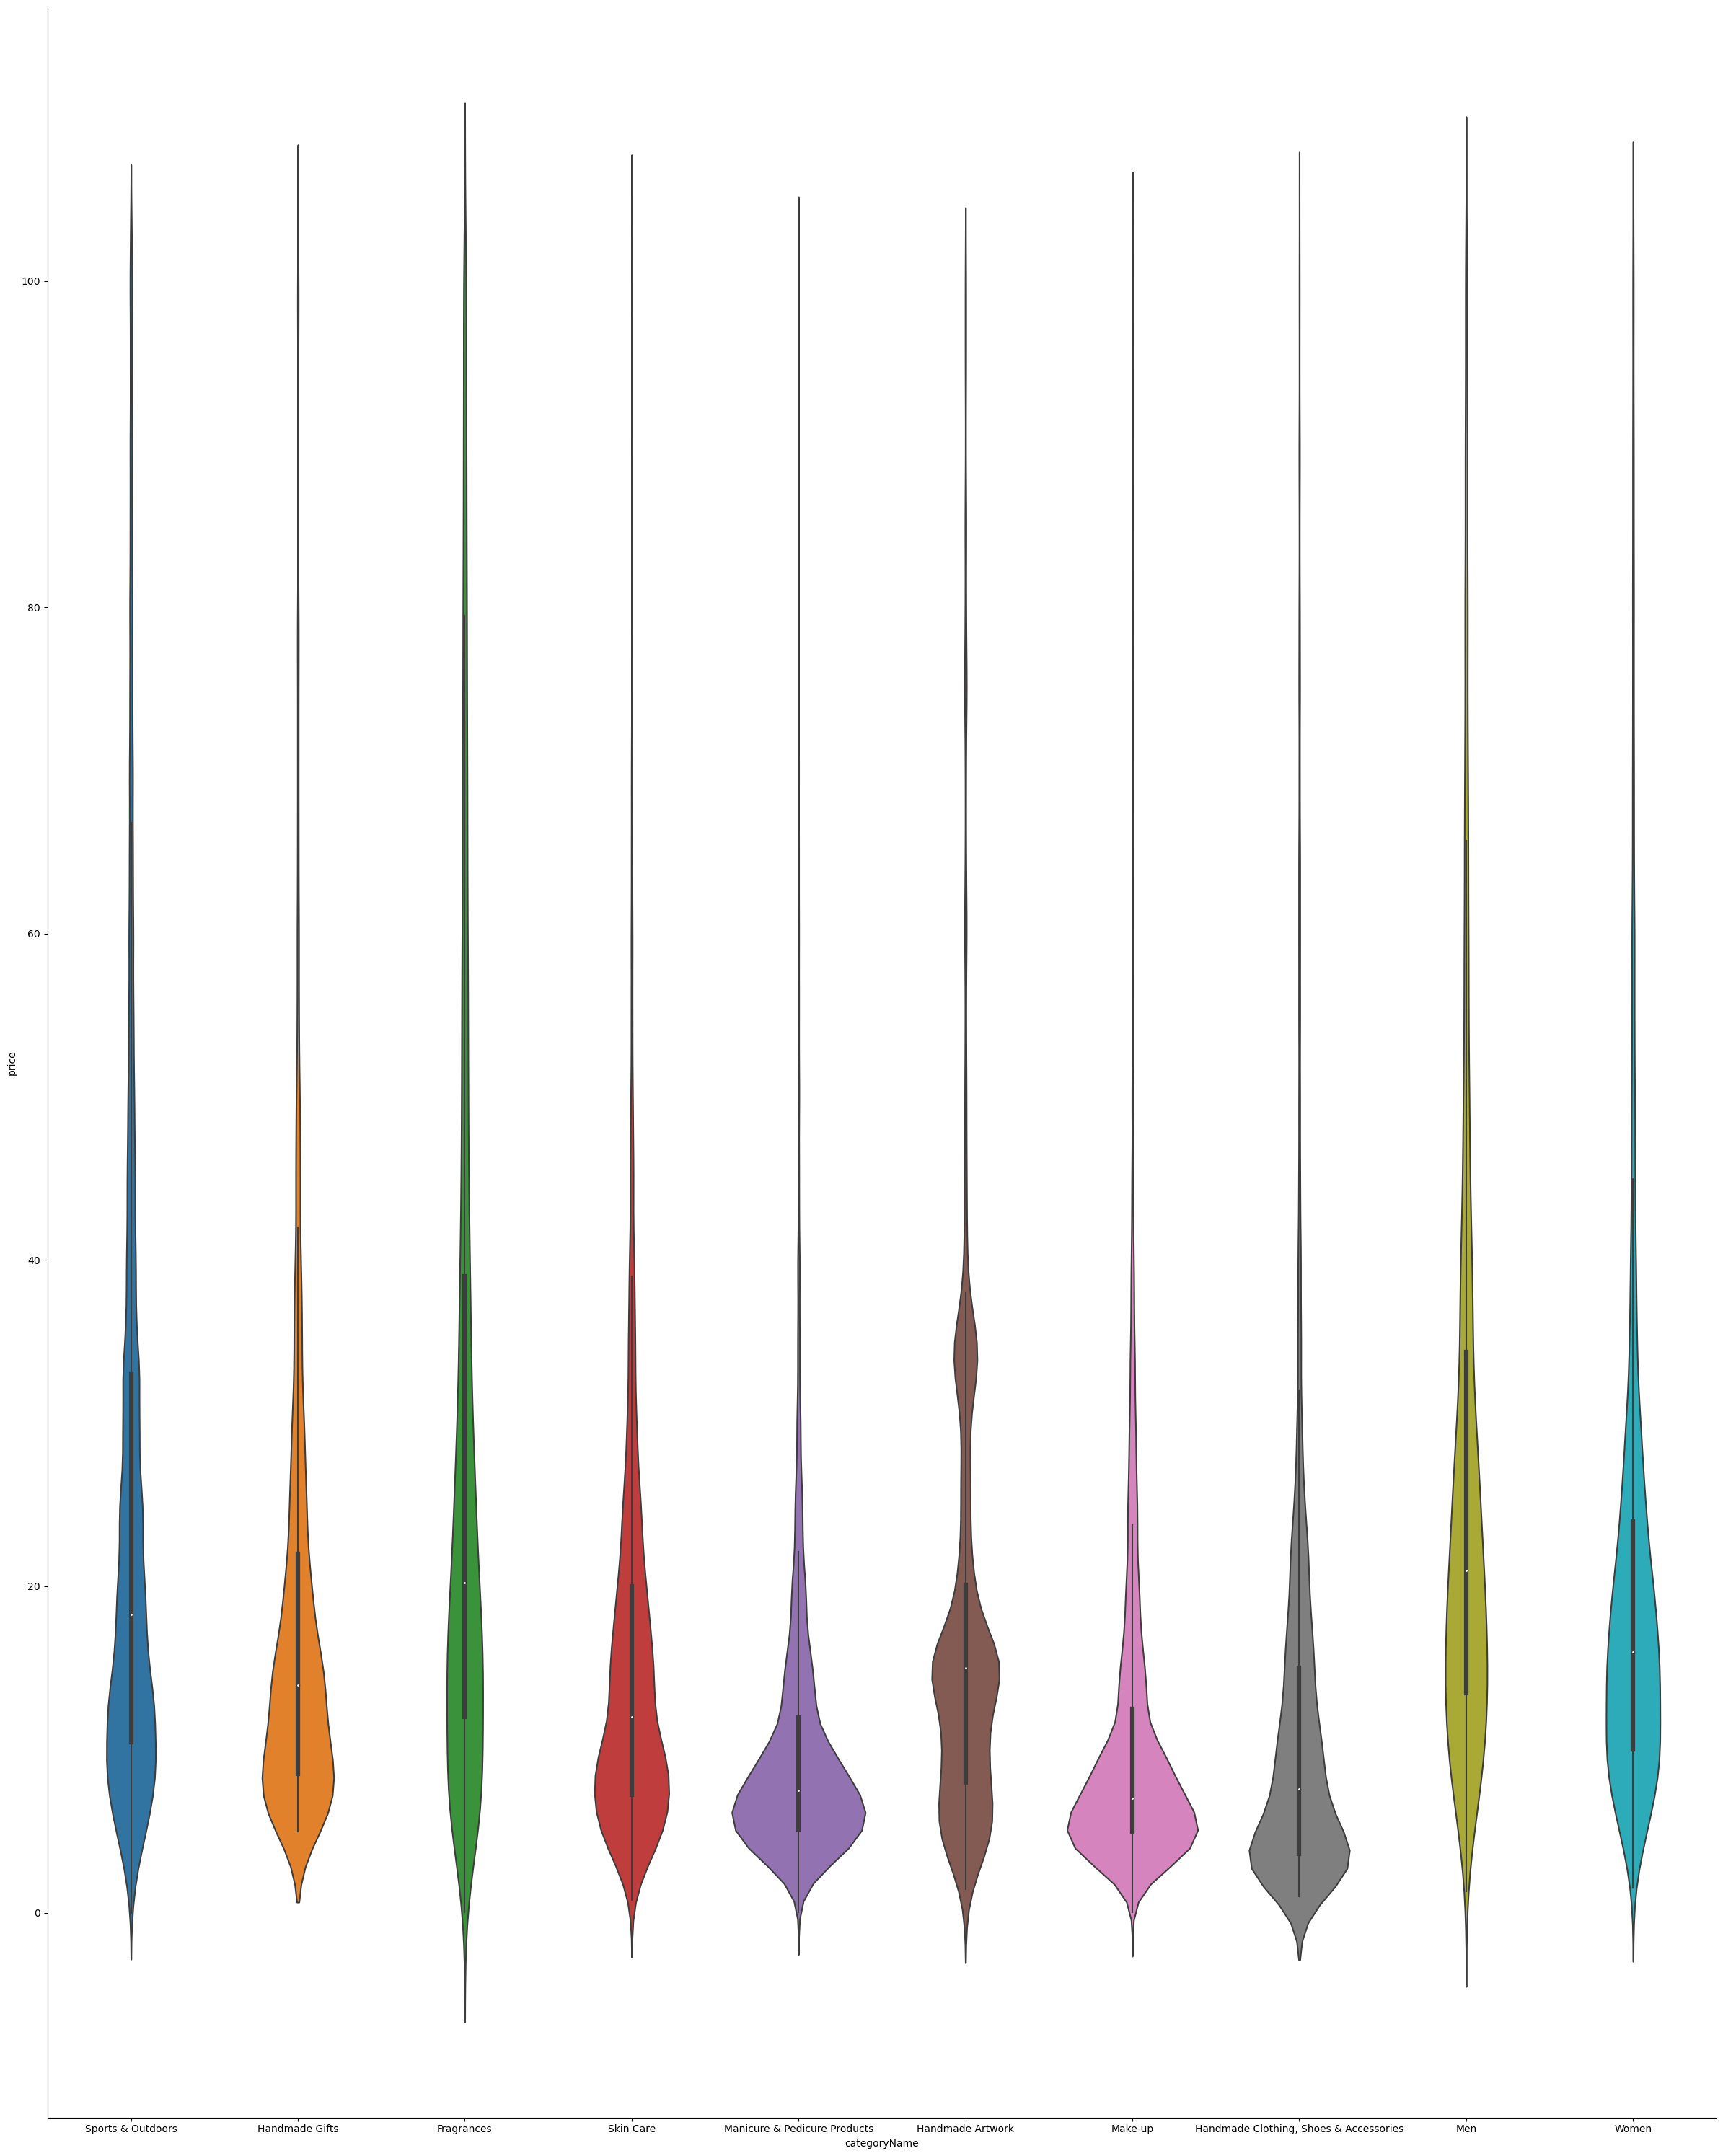

In [50]:
sns.catplot(data=df_no_outliers.loc[df_no_outliers['categoryName'].isin(filtered_categories)],x='categoryName',y='price',kind='violin',height=30,
           aspect=0.8)


# Which product category tends to have the highest median price? Don't filter here by top categories.

In [56]:
df_no_outliers.groupby('categoryName')['price'].median().sort_values(ascending=False).head(10)

categoryName
Desktop PCs               75.000
Tablets                   70.140
Boxing Shoes              69.990
Graphics Cards            68.565
Motherboards              68.470
Digital Frames            65.625
Made in Italy Handmade    64.000
Ski Helmets               61.690
Home Bar Furniture        59.990
Home Office Furniture     59.210
Name: price, dtype: float64

# Bar Charts:
Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

/Users/jamilyalipons/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Fragrances'),
  Text(3, 0, 'Skin Care'),
  Text(4, 0, 'Manicure & Pedicure Products'),
  Text(5, 0, 'Handmade Artwork'),
  Text(6, 0, 'Make-up'),
  Text(7, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(8, 0, 'Men'),
  Text(9, 0, 'Women')])

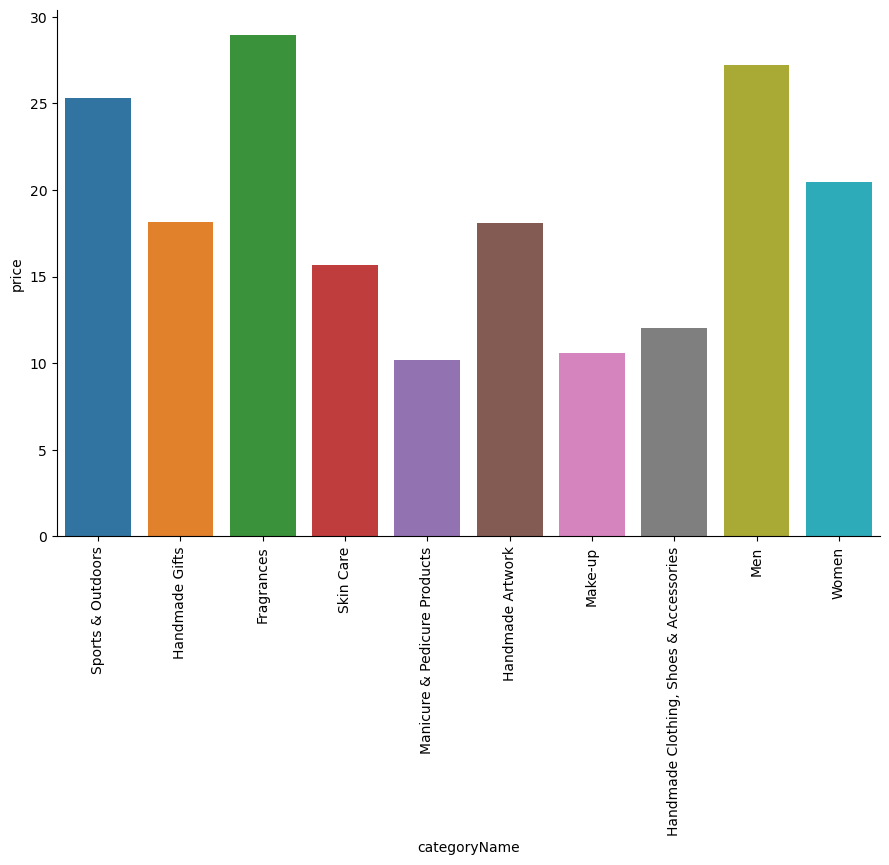

In [59]:
filtered_categories = df['categoryName'].value_counts().head(10).index
filtered_categories


sns.catplot(data=df_no_outliers.loc[df_no_outliers['categoryName'].isin(filtered_categories)],x='categoryName',y='price',kind='bar',height=6,
           aspect=1.5,errorbar=None)
plt.xticks(rotation=90)

In [60]:
df_no_outliers.groupby('categoryName')['price'].mean()

categoryName
3D Printers                       55.739722
3D Printing & Scanning            36.322571
Abrasive & Finishing Products     14.773266
Action Cameras                    42.760053
Adapters                           8.580000
                                    ...    
Wind Instruments                  20.337250
Window Treatments                 20.208992
Women                             20.450253
Women's Sports & Outdoor Shoes    51.131419
eBook Readers & Accessories       26.006952
Name: price, Length: 296, dtype: float64

# Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


/Users/jamilyalipons/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Fragrances'),
  Text(3, 0, 'Skin Care'),
  Text(4, 0, 'Manicure & Pedicure Products'),
  Text(5, 0, 'Handmade Artwork'),
  Text(6, 0, 'Make-up'),
  Text(7, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(8, 0, 'Men'),
  Text(9, 0, 'Women')])

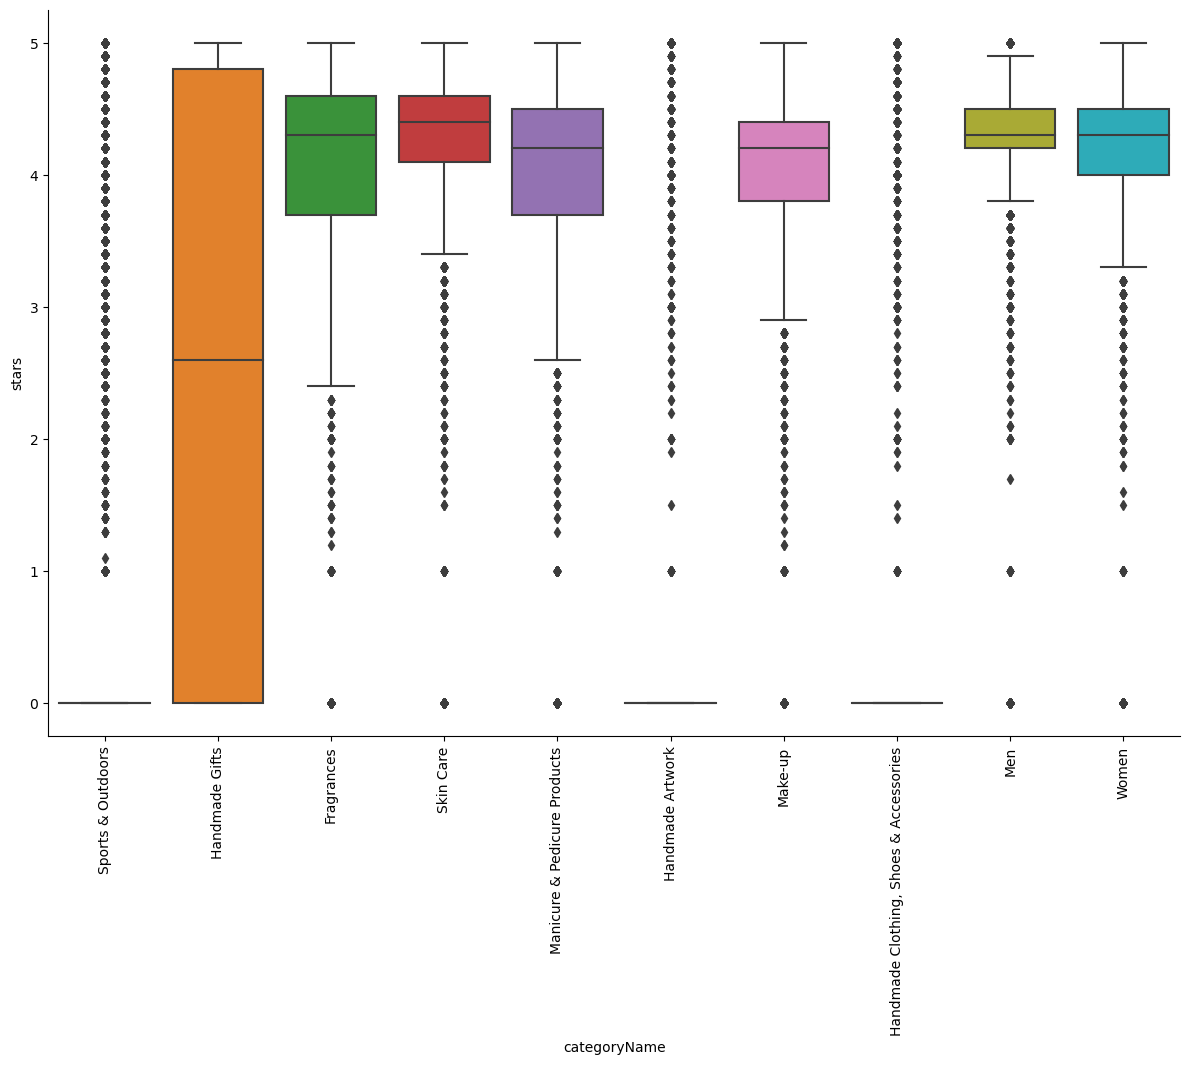

In [63]:
sns.catplot(data=df_no_outliers.loc[df_no_outliers['categoryName'].isin(filtered_categories)],x='categoryName',y='stars',kind='box',height=8,
           aspect=1.5)
plt.xticks(rotation=90)

In [64]:
df.groupby('categoryName')['stars'].median().sort_values(ascending=False)

categoryName
Computer Memory                 4.7
Building & Construction Toys    4.6
Beer, Wine & Spirits            4.6
Luxury Food & Drink             4.6
CPUs                            4.6
                               ... 
3D Printing & Scanning          0.0
KVM Switches                    0.0
Karaoke Equipment               0.0
Lab & Scientific Products       0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

# Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

1. Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?


In [65]:
df[['price','stars']].corr()

,price,stars
price,1.000000,-0.122505
stars,-0.122505,1.000000


# Visualizations:

1. Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?


<Axes: xlabel='stars', ylabel='price'>

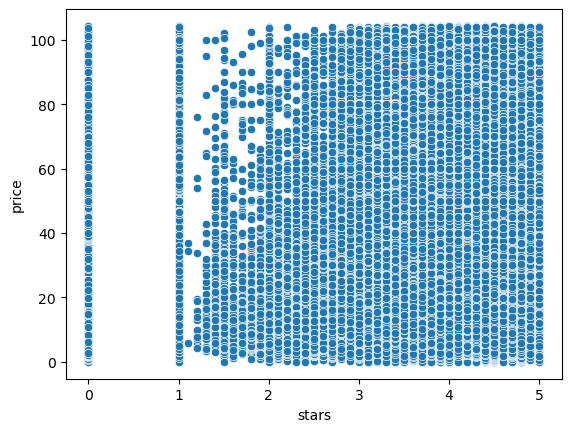

In [66]:
sns.scatterplot(data=df_no_outliers,x='stars',y='price')

<Axes: xlabel='stars', ylabel='price'>

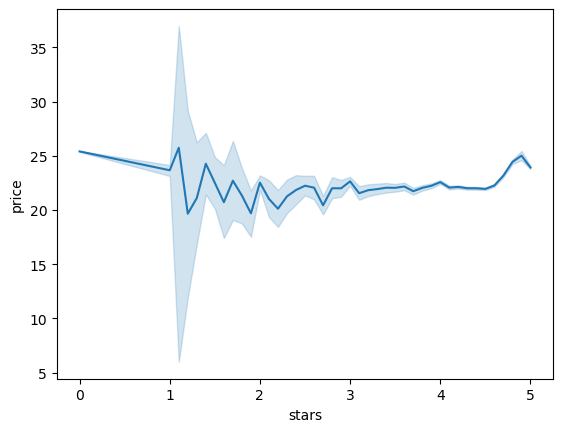

In [69]:
sns.lineplot(data=df_no_outliers,x='stars',y='price')

2. # Use a correlation heatmap to visualize correlations between all numerical variables.


<Axes: >

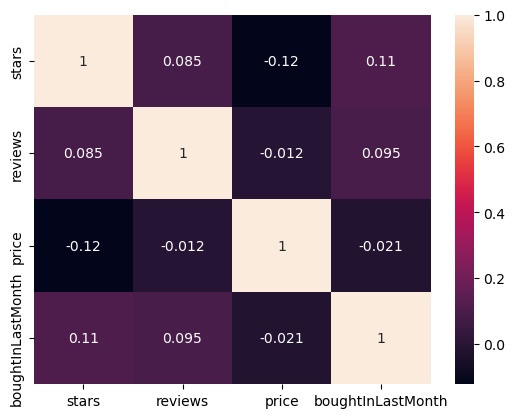

In [70]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)




# Examine if product prices typically follow a normal distribution using a QQ plot.

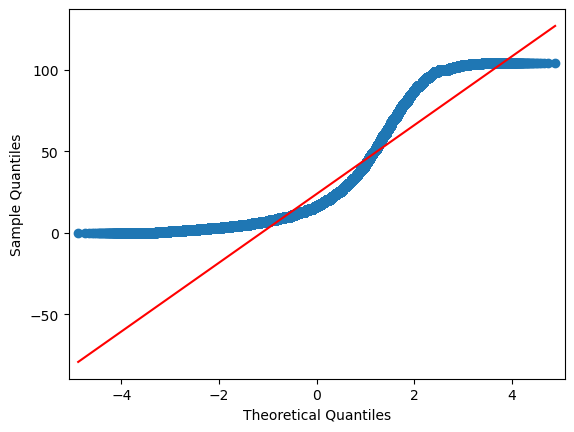

In [71]:
import statsmodels.api as sm

sm.qqplot(df_no_outliers['price'], line='s');